# Logistic Regression


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('breast-cancer.csv')

In [5]:
df = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
         'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','diagnosis']]

X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)


In [15]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(max_iter=1000)
Classifier.fit(X_train,y_train)

y_test_hat = Classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_hat)
print(cm)

[[98 10]
 [11 52]]


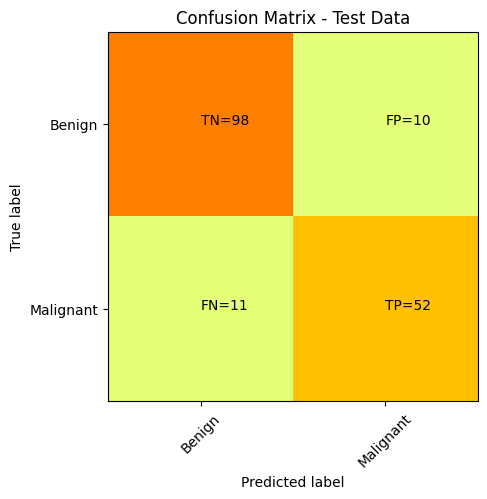

In [21]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
classNames=['Benign','Malignant']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s=[['TN','FP'],['FN','TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j]+"="+str(cm[i][j])))
        
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           B       0.90      0.91      0.90       108
           M       0.84      0.83      0.83        63

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



# KNN Model 
(distance based ML Algorithm)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_test_hat=model.predict(X_test)
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat})
Results.head(5)

,Actual,Predictions
421,B,B
47,M,B
292,B,B
186,M,M
414,M,M


# Random Forest Classifier
(ensemble model)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('data_banknote_authentication.csv')

In [30]:
df.columns

Index(['variance', 'skew', 'kurtosis', 'entropy', 'authentic'], dtype='object')

In [31]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [32]:
df['authentic'].value_counts()

authentic
0    762
1    610
Name: count, dtype: int64

In [37]:
df.sample(n=5,random_state=55).sort_values(['variance'])

,variance,skew,kurtosis,entropy,authentic
1180,-2.21830,-1.2540,2.9986,0.36378,1
769,-0.89409,3.1991,-1.8219,-2.94520,1
1353,0.11592,3.2219,-3.4302,-2.84570,1
239,2.39520,9.5083,-3.1783,-3.00860,0
722,4.84510,8.1116,-2.9512,-1.47240,0


In [38]:
X=df.drop('authentic',axis=1)
y=df['authentic']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [40]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(random_state=0,min_samples_leaf=10)
Classifier.fit(X_train,y_train)


RandomForestClassifier(min_samples_leaf=10, random_state=0)

In [41]:
y_test_hat=Classifier.predict(X_test)
Results = pd.DataFrame({'Actual':y_test})
column=pd.DataFrame({'Predictions':y_test_hat})
Results = Results.join(column.set_index(Results.index))
Results.head(5)

,Actual,Predictions
1240,1,1
703,0,0
821,1,1
1081,1,1
37,0,0


In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))


0.9878640776699029


In [43]:
y_train_hat=Classifier.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

0.9885416666666667


In [45]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm = confusion_matrix(y_test,y_test_hat)
print(cm)

[[231   4]
 [  1 176]]


In [46]:
#Assigning variables for convenience
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

recall = TP/float(FN+TP)
print("recall:",recall)

precision = TP/float(TP+FP)
print("precision:",precision)

specificity = TN/(TN+FP)
print("specificity:",specificity)



recall: 0.9943502824858758
precision: 0.9777777777777777
specificity: 0.9829787234042553


In [49]:

# Get feature importances
feature_importances = pd.DataFrame(Classifier.feature_importances_, index=X_train.columns, columns=['Importance'])

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


          Importance
variance    0.599044
skew        0.223925
kurtosis    0.133505
entropy     0.043526
